# **Association Rules_movies_data**

Prepare rules for the all the data sets

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values 
 
2) Change the minimum length in apriori algorithm 
 
3) Visulize the obtained rules using different plots

In [100]:
#Download mlxtend for Apriori,Association_rules,TransactionEncoder 
!pip install mlxtend

In [101]:
#import important libraries
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt


In [102]:
#Read the Dataset
movie=pd.read_csv("/content/drive/MyDrive/Assignment/my_movies.csv")
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [103]:
#remove all columns between columns from 0 to 4={v1,v2,v3,v4,v5}
df=movie.drop(movie.iloc[:,0:5],axis=1)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


**Apriori Algorithm**

In [104]:
frequent_itemsets = apriori(df, min_support=0.10, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [105]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(Green Mile),"(LOTR1, Sixth Sense, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(LOTR1),"(Green Mile, Sixth Sense, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(Green Mile, LOTR2, LOTR1, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Harry Potter1),"(Green Mile, Sixth Sense, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [106]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,1
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,1
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,1
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,1
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,1
...,...,...,...,...,...,...,...,...,...,...
245,(Green Mile),"(LOTR1, Sixth Sense, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1
246,(LOTR1),"(Green Mile, Sixth Sense, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1
247,(Sixth Sense),"(Green Mile, LOTR2, LOTR1, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1
248,(Harry Potter1),"(Green Mile, Sixth Sense, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1


***Records with Length 1 Support>=0.10***

In [107]:
frequent_itemsets[(frequent_itemsets['length'] == 1) &
                  (frequent_itemsets['support'] >= 0.10)]

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [108]:
rules[ (rules['antecedent_len'] ==1 ) &
       (rules['confidence'] >= 1.0) &
       (rules['lift'] > 1.2 )]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,1
12,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf,1
14,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf,1
16,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,1
19,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,1
24,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf,1
25,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf,1
30,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,1
35,(Braveheart),(Patriot),0.1,0.6,0.1,1.0,1.666667,0.04,inf,1
38,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf,1


In [109]:
rules.sort_values('support',ascending = False)[0:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
15,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1
14,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,1
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,1
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,1
40,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2


***Length 2 Support >=0.10***

In [110]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.10)]

,support,itemsets,length
10,0.5,"(Sixth Sense, Gladiator)",2
11,0.1,"(LOTR1, Sixth Sense)",2
12,0.1,"(Sixth Sense, Harry Potter1)",2
13,0.4,"(Patriot, Sixth Sense)",2
14,0.1,"(Sixth Sense, LOTR2)",2
15,0.1,"(LOTR, Sixth Sense)",2
16,0.2,"(Green Mile, Sixth Sense)",2
17,0.6,"(Patriot, Gladiator)",2
18,0.1,"(LOTR, Gladiator)",2
19,0.1,"(Gladiator, Braveheart)",2


***Antecedent Length = 2***

In [111]:
rules[ (rules['antecedent_len'] ==2 ) &
       (rules['confidence'] >= 0.8) &
       (rules['lift'] > 1.2 )]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
40,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf,2
42,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.8,1.333333,0.10,2.0,2
46,"(LOTR, Sixth Sense)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,2
47,"(LOTR, Gladiator)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,2
53,"(Green Mile, Gladiator)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,2
...,...,...,...,...,...,...,...,...,...,...
239,"(LOTR1, Sixth Sense)","(Green Mile, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2
240,"(LOTR1, Harry Potter1)","(Green Mile, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2
242,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2
243,"(Sixth Sense, LOTR2)","(Green Mile, LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2


***Length= 3 Support>=0.1***

In [112]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.1)]

,support,itemsets,length
30,0.4,"(Patriot, Sixth Sense, Gladiator)",3
31,0.1,"(LOTR, Sixth Sense, Gladiator)",3
32,0.1,"(Green Mile, Sixth Sense, Gladiator)",3
33,0.1,"(LOTR1, Sixth Sense, Harry Potter1)",3
34,0.1,"(LOTR1, Sixth Sense, LOTR2)",3
35,0.1,"(Green Mile, Sixth Sense, LOTR1)",3
36,0.1,"(Sixth Sense, LOTR2, Harry Potter1)",3
37,0.1,"(Green Mile, Sixth Sense, Harry Potter1)",3
38,0.1,"(Green Mile, Sixth Sense, LOTR2)",3
39,0.1,"(LOTR, Green Mile, Sixth Sense)",3


***Antecedent Length= 3***

In [113]:
rules[ (rules['antecedent_len'] ==3 ) &
       (rules['confidence'] >= 0.8) &
       (rules['lift'] > 1.2 )]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
136,"(LOTR, Green Mile, Sixth Sense)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,3
137,"(LOTR, Green Mile, Gladiator)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,3
138,"(LOTR, Sixth Sense, Gladiator)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
139,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.000000,0.09,inf,3
150,"(LOTR1, Sixth Sense, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
151,"(LOTR1, Sixth Sense, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
152,"(LOTR1, LOTR2, Harry Potter1)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,3
153,"(Sixth Sense, LOTR2, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
164,"(Green Mile, Sixth Sense, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
165,"(Green Mile, Sixth Sense, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3


***Length 4 Support >=0.1***

In [114]:
frequent_itemsets[ (frequent_itemsets['length'] == 4) &
                   (frequent_itemsets['support'] >= 0.1)]

,support,itemsets,length
46,0.1,"(LOTR, Green Mile, Sixth Sense, Gladiator)",4
47,0.1,"(LOTR1, Sixth Sense, LOTR2, Harry Potter1)",4
48,0.1,"(Green Mile, Sixth Sense, LOTR1, Harry Potter1)",4
49,0.1,"(Green Mile, Sixth Sense, LOTR2, LOTR1)",4
50,0.1,"(Green Mile, Sixth Sense, LOTR2, Harry Potter1)",4
51,0.1,"(Green Mile, LOTR2, LOTR1, Harry Potter1)",4


### **Forming rules for entire dataset**

In [115]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(Green Mile),"(LOTR1, Sixth Sense, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(LOTR1),"(Green Mile, Sixth Sense, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(Green Mile, LOTR2, LOTR1, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Harry Potter1),"(Green Mile, Sixth Sense, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [116]:
df1=rules[ (rules['lift'] >=1.2) & (rules['support'] >= 0.20) & (rules['confidence']>=0.50)]
df1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
14,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
15,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
24,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
25,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
40,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
42,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
43,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
45,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


In [117]:
df2=rules[ (rules['lift'] >=1.4) & (rules['support'] >= 0.20) & (rules['confidence']>=0.50)]
df2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
14,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
15,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
24,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
25,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
40,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
45,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


### **Plotting**

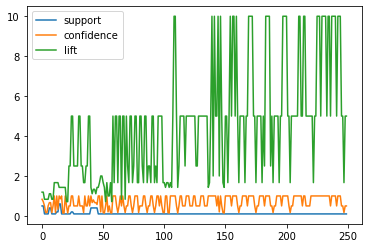

In [118]:
import matplotlib as plt
rules[['support', 'confidence','lift' ]].plot()

# **2)Assignment-09_Association Rules_Books_data**

Prepare rules for the all the data sets

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots

In [119]:
book=pd.read_csv("/content/drive/MyDrive/Assignment/book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [120]:
book1=pd.get_dummies(book)
book1

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


**Apriori Algorithm**

In [121]:
frequent_itemsets = apriori(book1, min_support=0.10, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [122]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


***Compute the antecedent length***

In [123]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,1
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,1
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,1
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,1
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,1
...,...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,1
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,1


***Records with Length 1 Support>=0.10***

In [124]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.10)]

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1


**Antecedent length =1**

In [125]:
rules[ (rules['antecedent_len'] ==1 ) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
28,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf,1


***Length 2 Support >=0.10***

In [126]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.10)]

,support,itemsets,length
9,0.1650,"(YouthBks, ChildBks)",2
10,0.2560,"(CookBks, ChildBks)",2
11,0.1840,"(DoItYBks, ChildBks)",2
12,0.1515,"(RefBks, ChildBks)",2
13,0.1625,"(ArtBks, ChildBks)",2
14,0.1950,"(GeogBks, ChildBks)",2
15,0.1620,"(CookBks, YouthBks)",2
16,0.1155,"(DoItYBks, YouthBks)",2
17,0.1010,"(ArtBks, YouthBks)",2
18,0.1205,"(GeogBks, YouthBks)",2


***Antecedent length =2***

In [127]:
rules[ (rules['antecedent_len'] ==2 ) &
       (rules['confidence'] >= 0.80) &
       (rules['lift'] > 1.8)
    ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
52,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,2
54,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,2
82,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,2
88,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,2
94,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,2


***Length 3 Support>0.10***

In [128]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.10)]

,support,itemsets,length
29,0.1290,"(CookBks, YouthBks, ChildBks)",3
30,0.1460,"(CookBks, DoItYBks, ChildBks)",3
31,0.1225,"(CookBks, RefBks, ChildBks)",3
32,0.1265,"(CookBks, ArtBks, ChildBks)",3
33,0.1495,"(CookBks, GeogBks, ChildBks)",3
34,0.1045,"(GeogBks, DoItYBks, ChildBks)",3
35,0.1020,"(ArtBks, GeogBks, ChildBks)",3
36,0.1015,"(ArtBks, DoItYBks, CookBks)",3
37,0.1085,"(GeogBks, DoItYBks, CookBks)",3
38,0.1035,"(ArtBks, GeogBks, CookBks)",3


In [129]:
rules['antecedent_len'] ==3  # Since no antecedent len==3 no rules can be formed

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: antecedent_len, Length: 100, dtype: bool

### **Forming rules for entire dataset**

In [130]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [131]:
books= rules[ (rules['lift'] >=2) & (rules['support'] >= 0.12) & (rules['confidence']>=0.55)]
books

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.282,0.1460,0.570312,2.022385,0.073808,1.670982
56,(RefBks),"(ChildBks, CookBks)",0.2145,0.256,0.1225,0.571096,2.230842,0.067588,1.734652
65,"(ChildBks, CookBks)",(GeogBks),0.2560,0.276,0.1495,0.583984,2.115885,0.078844,1.740319


In [132]:
books.sort_values('lift',ascending = False)[0:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
56,(RefBks),"(ChildBks, CookBks)",0.2145,0.256,0.1225,0.571096,2.230842,0.067588,1.734652
65,"(ChildBks, CookBks)",(GeogBks),0.2560,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
47,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.282,0.1460,0.570312,2.022385,0.073808,1.670982


### **Plotting**

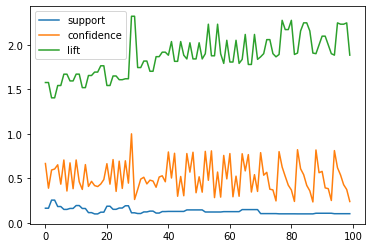

In [133]:
rules[['support', 'confidence','lift' ]].plot()